# Dzyaloshinkii-Moriya

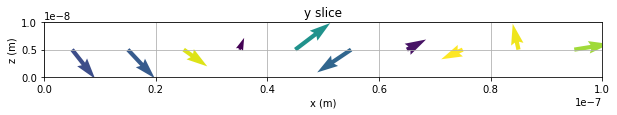

In [1]:
%matplotlib inline
import random
import oommfc as oc
import discretisedfield as df

random.seed(9999)

p1 = (0, 0, 0)
p2 = (100e-9, 10e-9, 10e-9)
cell = (10e-9, 10e-9, 10e-9)

mesh = oc.Mesh(p1=p1, p2=p2, cell=cell)

def random_m(pos):
    mx = 2*random.random() - 1
    my = 2*random.random() - 1
    mz = 2*random.random() - 1
    return mx, my, mz

Ms = 8e6  # magnetisation saturation (A/m)
random_field = df.Field(mesh, value=random_m, norm=Ms)
random_field.plot_slice("y", 0);

In [2]:
D = 5e-2  # Dzyaloshinkii-MOriya energy constant (J/m**2)

dmi = oc.DMI(D=D)

dmi

DMI(D=0.05)

In [3]:
system = oc.System(name="dmi_tutorial")

gamma = 2.211e5  # gyrotropic ration
alpha = 0.5  # Gilbert damping

system.dynamics = oc.Precession(gamma=gamma) + oc.Damping(alpha=alpha)
system.hamiltonian = dmi
system.m = random_field

2017/3/17 14:5: Calling OOMMF (dmi_tutorial/dmi_tutorial.mif) ... [6.4s]


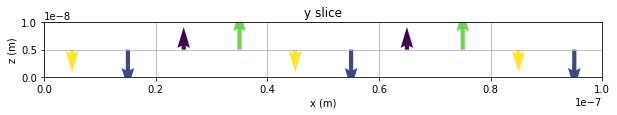

In [4]:
td = oc.TimeDriver()

td.drive(system, t=0.5e-9, n=100)

system.m.plot_slice("y", 0);